<a href="https://colab.research.google.com/github/MarcelahCaetanoh/Projeto-3-Jornada-DS/blob/main/Projeto_3_Jprnada_DS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Classificação usndo Scikit Learn e XGBoost**

In [16]:
import os
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

In [17]:

pd.set_option('display.max_rows' , None)
pd.set_option('display.max_columns' , None)

pd.set_option('display.float_format', lambda x: '%.2f' % x)


In [18]:
import pandas as pd
from google.colab import drive

drive.mount ('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
df_clientes = pd.read_csv('/content/drive/My Drive/Colab Notebooks/train.csv')
df_clientes.head()

,id,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,4030,Female,0,No,No,56.00,No,No phone service,DSL,Yes,Yes,Yes,Yes,No,No,Two year,No,NaN,45.05,2560.1,0
1,6731,Male,0,Yes,Yes,NaN,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.65,332.65,0
2,6479,Female,0,Yes,No,60.00,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),110.80,6640.7,0
3,6861,Female,0,No,No,37.00,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),101.90,3545.35,1
4,3266,Male,0,Yes,Yes,29.00,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.75,1974.8,1


In [20]:
df_clientes.columns

Index(['id', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [21]:
df_clientes['id'].is_unique

True

In [22]:
df_clientes = df_clientes.set_index('id')
df_clientes.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
id,,,,,,,,,,,,,,,,,,,,
4030,Female,0,No,No,56.00,No,No phone service,DSL,Yes,Yes,Yes,Yes,No,No,Two year,No,NaN,45.05,2560.1,0
6731,Male,0,Yes,Yes,NaN,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.65,332.65,0
6479,Female,0,Yes,No,60.00,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),110.80,6640.7,0
6861,Female,0,No,No,37.00,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),101.90,3545.35,1
3266,Male,0,Yes,Yes,29.00,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.75,1974.8,1


In [23]:
df_clientes.shape


(5634, 20)

In [24]:
df_clientes.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure              float64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                 int64
dtype: object

In [25]:
df_clientes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5634 entries, 4030 to 103
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5634 non-null   object 
 1   SeniorCitizen     5634 non-null   int64  
 2   Partner           5634 non-null   object 
 3   Dependents        5416 non-null   object 
 4   tenure            5173 non-null   float64
 5   PhoneService      5634 non-null   object 
 6   MultipleLines     5634 non-null   object 
 7   InternetService   5634 non-null   object 
 8   OnlineSecurity    5634 non-null   object 
 9   OnlineBackup      5634 non-null   object 
 10  DeviceProtection  5634 non-null   object 
 11  TechSupport       5634 non-null   object 
 12  StreamingTV       5634 non-null   object 
 13  StreamingMovies   5634 non-null   object 
 14  Contract          5634 non-null   object 
 15  PaperlessBilling  5634 non-null   object 
 16  PaymentMethod     5535 non-null   object

In [26]:
df_clientes['TotalCharges'].dtype


dtype('O')

In [27]:
df_clientes['TotalCharges'].value_counts()

20.2       8
           8
19.55      7
19.75      6
19.9       6
19.45      6
19.65      6
20.05      6
20.25      6
45.3       5
20.15      5
44.4       4
69.6       4
20.3       4
50.15      4
19.3       4
44         4
20.45      4
19.2       4
69.65      4
45.7       3
1284.2     3
20.4       3
70.1       3
49.9       3
19.85      3
470.2      3
74.35      3
20.1       3
50.45      3
35.9       3
24.4       3
50.75      3
69.55      3
74.6       3
19.95      3
220.45     3
69.9       3
20.35      3
85.5       3
70.45      3
74.7       3
69.95      3
80.55      3
75.3       3
69.1       3
70.6       3
69.25      3
45.1       3
19.5       3
383.65     3
44.75      3
25.25      3
70.3       3
1077.5     2
71.65      2
79.15      2
5714.2     2
96.8       2
20.95      2
235.05     2
4858.7     2
2104.55    2
75.35      2
2661.1     2
330.8      2
92.75      2
20.5       2
2560.1     2
469.65     2
223.15     2
300.4      2
398.55     2
86.6       2
70         2
42.9       2
145.15     2

In [28]:
df_clientes['TotalCharges'] = df_clientes['TotalCharges'].replace("\s+", "", regex=True)

In [29]:
pd.to_numeric(df_clientes['TotalCharges'], errors='coerce')

id
4030   2560.10
6731    332.65
6479   6640.70
6861   3545.35
3266   1974.80
6368   3442.80
5830   1848.80
4476     61.05
1508   1008.70
2921   6155.40
3145    110.15
333    4422.95
2140    458.10
3427     69.80
3379   6033.10
3163   1394.55
6471    345.50
2350   6565.85
3756    318.90
305    3141.70
6458    792.15
1124   1611.00
670    4039.30
878    3077.00
1507   3794.50
2258   4847.05
4152   3094.05
4416   4428.45
2989   7880.25
520     265.45
5701   2414.55
4982    712.75
2187    862.40
3008   2276.95
956      44.70
2866   7082.50
982     808.95
3762   5919.35
2295   1253.90
4733   1397.30
979    6383.35
192     531.00
676    7246.15
3451   7308.95
4322   1058.10
3331   4913.30
6666   1224.05
925    1820.90
3090   5646.60
5755    454.05
741    2879.90
4226    158.35
2020   7040.85
1471    156.85
1109   1678.05
832     963.95
3482    214.55
5644     75.90
6152    672.55
5899    800.30
6918   6052.25
3610   6423.00
2474    119.30
3220    571.75
1693    947.75
4811   1424.95
3122   

In [30]:
df_clientes['TotalCharges'] = pd.to_numeric(df_clientes['TotalCharges'], errors='coerce')

In [31]:
df_clientes.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure              float64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

**Começando com estatística descritiva**

In [32]:
df_clientes.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
count,5634.00,5173.00,5634.00,5626.00,5634.00
mean,0.16,32.33,64.63,2273.51,0.27
std,0.37,24.46,30.02,2258.38,0.44
min,0.00,0.00,18.25,18.80,0.00
25%,0.00,9.00,35.46,401.59,0.00
50%,0.00,29.00,70.25,1396.12,0.00
75%,0.00,55.00,89.80,3764.29,1.00
max,1.00,72.00,118.75,8684.80,1.00


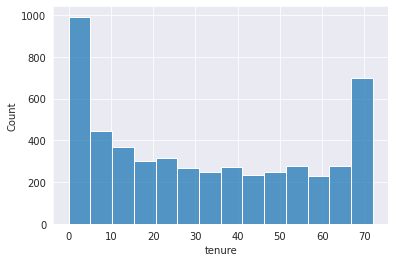

In [33]:
sns.set_style("darkgrid")
plt.tight_layout()

sns.histplot(data=df_clientes, x='tenure')

In [34]:
len(df_clientes.loc[df_clientes['tenure'] == 0])

8

In [35]:
df_clientes.describe(percentiles=np.linspace(0, 1, 11))

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
count,5634.00,5173.00,5634.00,5626.00,5634.00
mean,0.16,32.33,64.63,2273.51,0.27
std,0.37,24.46,30.02,2258.38,0.44
min,0.00,0.00,18.25,18.80,0.00
0%,0.00,0.00,18.25,18.80,0.00
10%,0.00,2.00,20.05,85.50,0.00
20%,0.00,6.00,25.10,267.00,0.00
30%,0.00,12.00,45.80,550.98,0.00
40%,0.00,20.00,58.60,939.80,0.00
50%,0.00,29.00,70.25,1396.12,0.00


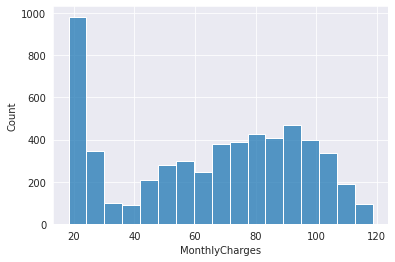

In [36]:
sns.set_style("darkgrid")
plt.tight_layout()

sns.histplot(data=df_clientes, x='MonthlyCharges')

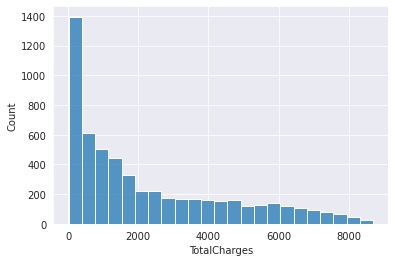

In [37]:
sns.set_style("darkgrid")
plt.tight_layout()

sns.histplot(data=df_clientes, x='TotalCharges')

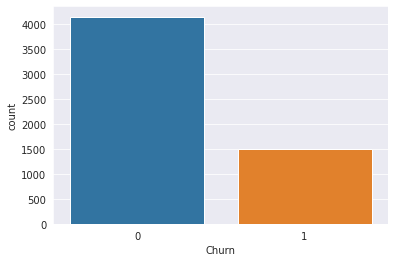

In [38]:
sns.countplot(data=df_clientes, x='Churn')

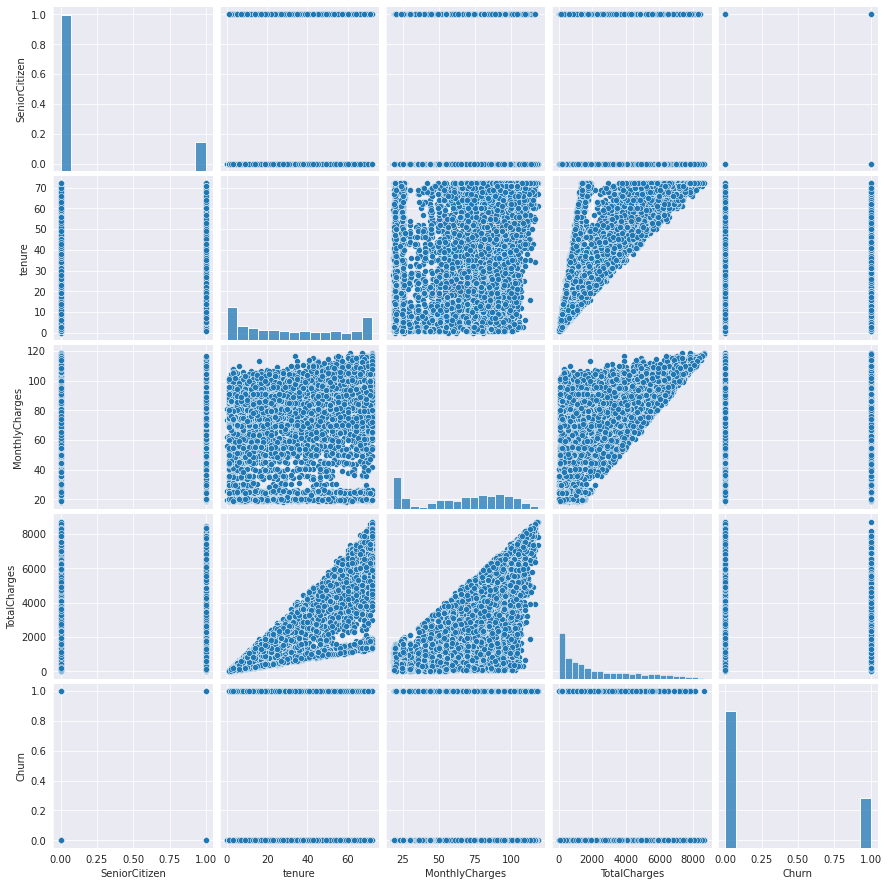

In [39]:
sns.pairplot(data=df_clientes)

**Codificar as variáveis categóricas**

In [40]:
df_clientes.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
id,,,,,,,,,,,,,,,,,,,,
4030,Female,0,No,No,56.00,No,No phone service,DSL,Yes,Yes,Yes,Yes,No,No,Two year,No,NaN,45.05,2560.10,0
6731,Male,0,Yes,Yes,NaN,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.65,332.65,0
6479,Female,0,Yes,No,60.00,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),110.80,6640.70,0
6861,Female,0,No,No,37.00,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),101.90,3545.35,1
3266,Male,0,Yes,Yes,29.00,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.75,1974.80,1


In [41]:
colunas_categoricas = [coluna for coluna in df_clientes.columns if coluna not in df_clientes._get_numeric_data().columns]
colunas_categoricas

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [42]:
for coluna_categorica in colunas_categoricas:
    display(df_clientes[coluna_categorica].value_counts())

Male      2849
Female    2785
Name: gender, dtype: int64

No     2902
Yes    2732
Name: Partner, dtype: int64

No     3793
Yes    1623
Name: Dependents, dtype: int64

Yes    5082
No      552
Name: PhoneService, dtype: int64

No                  2692
Yes                 2390
No phone service     552
Name: MultipleLines, dtype: int64

Fiber optic    2451
DSL            1959
No             1224
Name: InternetService, dtype: int64

No                     2763
Yes                    1647
No internet service    1224
Name: OnlineSecurity, dtype: int64

No                     2488
Yes                    1922
No internet service    1224
Name: OnlineBackup, dtype: int64

No                     2480
Yes                    1930
No internet service    1224
Name: DeviceProtection, dtype: int64

No                     2793
Yes                    1617
No internet service    1224
Name: TechSupport, dtype: int64

No                     2240
Yes                    2170
No internet service    1224
Name: StreamingTV, dtype: int64

No                     2218
Yes                    2192
No internet service    1224
Name: StreamingMovies, dtype: int64

Month-to-month    3084
Two year          1358
One year          1192
Name: Contract, dtype: int64

Yes    3312
No     2322
Name: PaperlessBilling, dtype: int64

Electronic check             1887
Mailed check                 1272
Bank transfer (automatic)    1212
Credit card (automatic)      1164
Name: PaymentMethod, dtype: int64

In [43]:
df_clientes['gender'] = df_clientes['gender'].map({'Female': 1, 'Male': 0})

colunas_binarias = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']

for coluna_binaria in colunas_binarias:
    df_clientes[coluna_binaria] = df_clientes[coluna_binaria].map({'Yes': 1, 'No': 0})

In [44]:
colunas_categoricas = [coluna for coluna in df_clientes.columns if coluna not in df_clientes._get_numeric_data().columns]
colunas_categoricas

['MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaymentMethod']

In [45]:
df_clientes['Contract'] = df_clientes['Contract'].map({'Month-to-month': 0, 'One year': 1, 'Two year': 2})
df_clientes['InternetService'] = df_clientes['InternetService'].map({'No': 0, 'DSL': 1, 'Fiber optic': 2})
df_clientes['PaymentMethod'] = df_clientes['PaymentMethod'].map({'Mailed check': 0, 'Eletronic check': 1, 'Bank transfer (automatic)': 2, 'Credit card (automatic)': 3 })
df_clientes.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
id,,,,,,,,,,,,,,,,,,,,
4030,1,0,0,0.00,56.00,0,No phone service,1,Yes,Yes,Yes,Yes,No,No,2,0,NaN,45.05,2560.10,0
6731,0,0,1,1.00,NaN,1,No,0,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,1,0,0.00,19.65,332.65,0
6479,1,0,1,0.00,60.00,1,Yes,2,No,Yes,Yes,Yes,Yes,Yes,2,1,3.00,110.80,6640.70,0
6861,1,0,0,0.00,37.00,1,Yes,2,No,Yes,Yes,No,Yes,Yes,0,1,2.00,101.90,3545.35,1
3266,0,0,1,1.00,29.00,1,No,2,No,No,No,No,No,No,0,1,NaN,70.75,1974.80,1


In [46]:
df_clientes.dtypes

gender                int64
SeniorCitizen         int64
Partner               int64
Dependents          float64
tenure              float64
PhoneService          int64
MultipleLines        object
InternetService       int64
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract              int64
PaperlessBilling      int64
PaymentMethod       float64
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

In [47]:
colunas_categoricas = [coluna for coluna in df_clientes.columns if coluna not in df_clientes._get_numeric_data().columns]
colunas_categoricas

['MultipleLines',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies']

In [48]:
from sklearn.preprocessing import OneHotEncoder

In [49]:
ohe =  OneHotEncoder(sparse=False, drop='first')
df_ohe_transformadas = ohe.fit_transform(df_clientes[colunas_categoricas])
ohe.categories_

[array(['No', 'No phone service', 'Yes'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object)]

In [50]:
ohe.get_feature_names_out()

array(['MultipleLines_No phone service', 'MultipleLines_Yes',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes'],
      dtype=object)

In [51]:
df_ohe_transformadas

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 1., 0.],
       [0., 1., 0., ..., 1., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 1., 0.],
       [0., 1., 0., ..., 1., 0., 0.]])

In [52]:
df_ohe_transformadas = pd.DataFrame(data=df_ohe_transformadas, columns=ohe.get_feature_names_out(), index=df_clientes.index)
df_ohe_transformadas.head()

,MultipleLines_No phone service,MultipleLines_Yes,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes
id,,,,,,,,,,,,,,
4030,1.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00
6731,0.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00
6479,0.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00
6861,0.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00
3266,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [53]:
df_clientes =pd.concat([df_clientes, df_ohe_transformadas], axis=1)
df_clientes.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MultipleLines_No phone service,MultipleLines_Yes,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
4030,1,0,0,0.00,56.00,0,No phone service,1,Yes,Yes,Yes,Yes,No,No,2,0,NaN,45.05,2560.10,0,1.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00
6731,0,0,1,1.00,NaN,1,No,0,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,1,0,0.00,19.65,332.65,0,0.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00
6479,1,0,1,0.00,60.00,1,Yes,2,No,Yes,Yes,Yes,Yes,Yes,2,1,3.00,110.80,6640.70,0,0.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00
6861,1,0,0,0.00,37.00,1,Yes,2,No,Yes,Yes,No,Yes,Yes,0,1,2.00,101.90,3545.35,1,0.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00
3266,0,0,1,1.00,29.00,1,No,2,No,No,No,No,No,No,0,1,NaN,70.75,1974.80,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [54]:
df_clientes = df_clientes.drop(colunas_categoricas, axis=1)
df_clientes.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MultipleLines_No phone service,MultipleLines_Yes,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes
id,,,,,,,,,,,,,,,,,,,,,,,,,,,
4030,1,0,0,0.00,56.00,0,1,2,0,NaN,45.05,2560.10,0,1.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00
6731,0,0,1,1.00,NaN,1,0,1,0,0.00,19.65,332.65,0,0.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00
6479,1,0,1,0.00,60.00,1,2,2,1,3.00,110.80,6640.70,0,0.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00
6861,1,0,0,0.00,37.00,1,2,0,1,2.00,101.90,3545.35,1,0.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00
3266,0,0,1,1.00,29.00,1,2,0,1,NaN,70.75,1974.80,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [55]:
df_clientes.dtypes

gender                                    int64
SeniorCitizen                             int64
Partner                                   int64
Dependents                              float64
tenure                                  float64
PhoneService                              int64
InternetService                           int64
Contract                                  int64
PaperlessBilling                          int64
PaymentMethod                           float64
MonthlyCharges                          float64
TotalCharges                            float64
Churn                                     int64
MultipleLines_No phone service          float64
MultipleLines_Yes                       float64
OnlineSecurity_No internet service      float64
OnlineSecurity_Yes                      float64
OnlineBackup_No internet service        float64
OnlineBackup_Yes                        float64
DeviceProtection_No internet service    float64
DeviceProtection_Yes                    

**Separando variáveis preditoras X de variaveis target y**

In [56]:
X = df_clientes.drop('Churn', axis=1)
y = df_clientes[['Churn']]

In [57]:
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,MultipleLines_No phone service,MultipleLines_Yes,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes
id,,,,,,,,,,,,,,,,,,,,,,,,,,
4030,1,0,0,0.00,56.00,0,1,2,0,NaN,45.05,2560.10,1.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00
6731,0,0,1,1.00,NaN,1,0,1,0,0.00,19.65,332.65,0.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00
6479,1,0,1,0.00,60.00,1,2,2,1,3.00,110.80,6640.70,0.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00
6861,1,0,0,0.00,37.00,1,2,0,1,2.00,101.90,3545.35,0.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00
3266,0,0,1,1.00,29.00,1,2,0,1,NaN,70.75,1974.80,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [58]:
y.head()

,Churn
id,
4030,0
6731,0
6479,0
6861,1
3266,1


**Separando as bases**

In [59]:
from sklearn.model_selection import train_test_split

X_treino, X_teste, y_treino, y_teste = train_test_split (X, y, test_size=.2, random_state=42 )

X_treino.shape, X_teste.shape, y_treino.shape, y_teste.shape

((4507, 26), (1127, 26), (4507, 1), (1127, 1))

In [60]:
X_treino.shape[0] / X.shape[0]

0.7999645012424565

In [61]:
X_treino.isnull().sum()

gender                                     0
SeniorCitizen                              0
Partner                                    0
Dependents                               171
tenure                                   366
PhoneService                               0
InternetService                            0
Contract                                   0
PaperlessBilling                           0
PaymentMethod                           1595
MonthlyCharges                             0
TotalCharges                               6
MultipleLines_No phone service             0
MultipleLines_Yes                          0
OnlineSecurity_No internet service         0
OnlineSecurity_Yes                         0
OnlineBackup_No internet service           0
OnlineBackup_Yes                           0
DeviceProtection_No internet service       0
DeviceProtection_Yes                       0
TechSupport_No internet service            0
TechSupport_Yes                            0
StreamingT

In [62]:
X_teste.isnull().sum()

gender                                    0
SeniorCitizen                             0
Partner                                   0
Dependents                               47
tenure                                   95
PhoneService                              0
InternetService                           0
Contract                                  0
PaperlessBilling                          0
PaymentMethod                           391
MonthlyCharges                            0
TotalCharges                              2
MultipleLines_No phone service            0
MultipleLines_Yes                         0
OnlineSecurity_No internet service        0
OnlineSecurity_Yes                        0
OnlineBackup_No internet service          0
OnlineBackup_Yes                          0
DeviceProtection_No internet service      0
DeviceProtection_Yes                      0
TechSupport_No internet service           0
TechSupport_Yes                           0
StreamingTV_No internet service 

In [63]:
X_treino_original = X_treino.copy()
X_teste_original = X_teste.copy()

y_treino_original = y_treino.copy()
y_teste_original = y_teste.copy()

In [64]:
mediana_tenure = X_treino ['tenure'].median()
mediana_dependents = X_treino ['Dependents'].median()
mediana_total_charges = X_treino ['TotalCharges'].median()
moda_payment_method = X_treino['PaymentMethod'].value_counts().index[0]

mediana_tenure,mediana_dependents,mediana_total_charges,moda_payment_method

(29.0, 0.0, 1389.6, 0.0)

In [65]:
X_treino.loc[X_treino['tenure'].isnull(), 'tenure'] = mediana_tenure
X_treino.loc[X_treino['Dependents'].isnull(), 'Dependents'] = mediana_dependents
X_treino.loc[X_treino['TotalCharges'].isnull(), 'TotalCharges'] = mediana_total_charges
X_treino.loc[X_treino['PaymentMethod'].isnull(), 'PaymentMethod'] = moda_payment_method

X_treino.isnull().sum()

gender                                  0
SeniorCitizen                           0
Partner                                 0
Dependents                              0
tenure                                  0
PhoneService                            0
InternetService                         0
Contract                                0
PaperlessBilling                        0
PaymentMethod                           0
MonthlyCharges                          0
TotalCharges                            0
MultipleLines_No phone service          0
MultipleLines_Yes                       0
OnlineSecurity_No internet service      0
OnlineSecurity_Yes                      0
OnlineBackup_No internet service        0
OnlineBackup_Yes                        0
DeviceProtection_No internet service    0
DeviceProtection_Yes                    0
TechSupport_No internet service         0
TechSupport_Yes                         0
StreamingTV_No internet service         0
StreamingTV_Yes                   

In [66]:
X_teste.loc[X_teste['tenure'].isnull(), 'tenure'] = mediana_tenure
X_teste.loc[X_teste['Dependents'].isnull(), 'Dependents'] = mediana_dependents
X_teste.loc[X_teste['TotalCharges'].isnull(), 'TotalCharges'] = mediana_total_charges
X_teste.loc[X_teste['PaymentMethod'].isnull(), 'PaymentMethod'] = moda_payment_method

X_teste.isnull().sum()

gender                                  0
SeniorCitizen                           0
Partner                                 0
Dependents                              0
tenure                                  0
PhoneService                            0
InternetService                         0
Contract                                0
PaperlessBilling                        0
PaymentMethod                           0
MonthlyCharges                          0
TotalCharges                            0
MultipleLines_No phone service          0
MultipleLines_Yes                       0
OnlineSecurity_No internet service      0
OnlineSecurity_Yes                      0
OnlineBackup_No internet service        0
OnlineBackup_Yes                        0
DeviceProtection_No internet service    0
DeviceProtection_Yes                    0
TechSupport_No internet service         0
TechSupport_Yes                         0
StreamingTV_No internet service         0
StreamingTV_Yes                   

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [68]:
regressao_logistica = LogisticRegression(max_iter=500)

In [69]:
valores_f1_rl = cross_val_score(estimator=regressao_logistica,
                                  X=X_treino,
                                  y=y_treino.values.flatten(),
                                  cv=10,
                                  scoring='f1')
valores_f1_rl

array([0.62280702, 0.63755459, 0.59649123, 0.5470852 , 0.64      ,
       0.64377682, 0.66666667, 0.59292035, 0.55072464, 0.60633484])

In [70]:
len(valores_f1_rl)

10

In [72]:
media_f1_rl = valores_f1_rl.mean()
f'f1-score: {media_f1_rl*100}'

'f1-score: 61.043613565540156'

In [73]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier()

valores_f1_rl = cross_val_score(estimator=random_forest,
                                  X=X_treino,
                                  y=y_treino.values.flatten(),
                                  cv=10,
                                  scoring='f1')
valores_f1_rl

array([0.57142857, 0.59259259, 0.56387665, 0.49074074, 0.61538462,
       0.65158371, 0.59259259, 0.55140187, 0.53398058, 0.59728507])

In [74]:
len(valores_f1_rl)

10

In [75]:
media_f1_rl = valores_f1_rl.mean()
f'f1-score: {media_f1_rl*100}'

'f1-score: 57.608669946851855'

In [76]:
import xgboost as xgb

In [77]:
xgb_model = xgb.XGBClassifier(random_state=42, objective='binary:logistic', use_label_encoder=False, eval_metric='error')

valores_f1_xgb = cross_val_score(estimator=xgb_model,
                                  X=X_treino,
                                  y=y_treino.values.flatten(),
                                  cv=10,
                                  scoring='f1')
valores_f1_xgb

array([0.57943925, 0.59388646, 0.6367713 , 0.50704225, 0.65137615,
       0.63716814, 0.66063348, 0.60792952, 0.56730769, 0.63963964])

In [78]:
media_f1_xgb = valores_f1_xgb.mean()
f'f1-score: {media_f1_xgb*100}'

'f1-score: 60.811938890987435'

In [79]:
X_treino['tenure'] = X_treino_original['tenure']
X_teste['tenure'] = X_teste_original['tenure']

In [80]:
X_treino['tenure'].isnull().sum()

366

In [81]:
X_teste['tenure'].isnull().sum()

95

In [82]:
X_treino.loc[X_treino['tenure'].isna(), 'tenure'] = X_treino.loc[X_treino['tenure'].isna(), 'TotalCharges'] / X_treino.loc[X_treino['tenure'].isna(), 'MonthlyCharges'] 

In [83]:
len(X_treino.loc[X_treino['tenure'].isna()])

0

In [84]:
rl_2 = LogisticRegression(max_iter=500)

valores_f1_rl2 = cross_val_score(estimator=rl_2,
                                  X=X_treino,
                                  y=y_treino.values.flatten(),
                                  cv=10,
                                  scoring='f1')
valores_f1_rl2

array([0.62882096, 0.65502183, 0.60869565, 0.57268722, 0.65789474,
       0.63865546, 0.6695279 , 0.61135371, 0.58604651, 0.64888889])

In [86]:
media_f1_rl2 = valores_f1_rl2.mean()
f'f1-score: {media_f1_rl2*100}'

'f1-score: 62.77592879933218'

In [87]:
X_treino['Dependents'].isnull().sum()

0

In [88]:
X_treino['Dependents'] = X_treino_original['Dependents']
X_treino['Dependents'].isnull().sum()

171

In [89]:
from sklearn.impute import KNNImputer

imputacao_knn =KNNImputer(n_neighbors=2)
treino_imputado = imputacao_knn.fit_transform(X_treino)
treino_imputado

array([[0., 0., 1., ..., 1., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 1., ..., 1., 0., 0.],
       ...,
       [1., 0., 1., ..., 0., 1., 0.],
       [1., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 1., 0.]])

In [90]:
imputacao_knn.feature_names_in_

array(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'InternetService', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes'],
      dtype=object)

In [91]:
treino_imputado.shape

(4507, 26)

In [92]:
treino_imputado[:, 3]

array([0.5, 0. , 1. , ..., 1. , 1. , 1. ])

In [94]:
X_treino['Dependents'] = treino_imputado[:, 3]
X_treino['Dependents'].isnull().sum()

0

In [95]:
X_treino.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,MultipleLines_No phone service,MultipleLines_Yes,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes
id,,,,,,,,,,,,,,,,,,,,,,,,,,
3559,0,0,1,0.50,28.00,1,2,1,0,2.00,92.20,2568.15,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00
896,0,0,0,0.00,30.00,1,2,0,1,0.00,94.30,2679.70,0.00,1.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
3600,1,0,1,1.00,45.00,1,1,0,0,0.00,81.30,3541.10,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,0.00
6991,0,0,1,0.00,36.00,1,2,0,1,0.00,93.60,3366.05,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00
5455,1,1,1,0.00,1.00,1,2,0,1,0.00,69.55,69.55,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [97]:
X_treino_original.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,MultipleLines_No phone service,MultipleLines_Yes,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes
id,,,,,,,,,,,,,,,,,,,,,,,,,,
3559,0,0,1,NaN,28.00,1,2,1,0,2.00,92.20,2568.15,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00
896,0,0,0,0.00,30.00,1,2,0,1,NaN,94.30,2679.70,0.00,1.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
3600,1,0,1,1.00,45.00,1,1,0,0,0.00,81.30,3541.10,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,0.00
6991,0,0,1,0.00,36.00,1,2,0,1,NaN,93.60,3366.05,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00
5455,1,1,1,0.00,1.00,1,2,0,1,NaN,69.55,69.55,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [98]:
rl_3 = LogisticRegression(max_iter=500)

valores_f1_rl3 = cross_val_score(estimator=rl_3,
                                  X=X_treino,
                                  y=y_treino.values.flatten(),
                                  cv=10,
                                  scoring='f1')
valores_f1_rl3

array([0.62280702, 0.65217391, 0.62660944, 0.58515284, 0.65789474,
       0.64435146, 0.67234043, 0.61135371, 0.59534884, 0.63111111])

In [99]:
media_f1_rl3 = valores_f1_rl3.mean()
f'f1-score: {media_f1_rl3*100}'

'f1-score: 62.99143497995344'

In [100]:
X_treino.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,MultipleLines_No phone service,MultipleLines_Yes,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes
id,,,,,,,,,,,,,,,,,,,,,,,,,,
3559,0,0,1,0.50,28.00,1,2,1,0,2.00,92.20,2568.15,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00
896,0,0,0,0.00,30.00,1,2,0,1,0.00,94.30,2679.70,0.00,1.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
3600,1,0,1,1.00,45.00,1,1,0,0,0.00,81.30,3541.10,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,0.00
6991,0,0,1,0.00,36.00,1,2,0,1,0.00,93.60,3366.05,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00
5455,1,1,1,0.00,1.00,1,2,0,1,0.00,69.55,69.55,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [101]:
X_treino['tem_internet'] = X_treino['InternetService'].isin([1, 2]).astype(int)

X_treino['tem_fidelidade'] = X_treino['Contract'].isin([1, 2]).astype(int)

In [102]:
X_treino = X_treino_original
X_treino.loc[X_treino['tenure'].isna(), 'tenure'] = X_treino.loc[X_treino['tenure'].isna(), 'TotalCharges'] / X_treino.loc[X_treino['tenure'].isna(), 'MonthlyCharges'] 
X_treino.loc[X_treino['Dependents'].isnull(), 'Dependents'] = mediana_dependents
X_treino.loc[X_treino['TotalCharges'].isnull(), 'TotalCharges'] = mediana_total_charges
X_treino.loc[X_treino['PaymentMethod'].isnull(), 'PaymentMethod'] = moda_payment_method

X_treino.isnull().sum()

gender                                  0
SeniorCitizen                           0
Partner                                 0
Dependents                              0
tenure                                  0
PhoneService                            0
InternetService                         0
Contract                                0
PaperlessBilling                        0
PaymentMethod                           0
MonthlyCharges                          0
TotalCharges                            0
MultipleLines_No phone service          0
MultipleLines_Yes                       0
OnlineSecurity_No internet service      0
OnlineSecurity_Yes                      0
OnlineBackup_No internet service        0
OnlineBackup_Yes                        0
DeviceProtection_No internet service    0
DeviceProtection_Yes                    0
TechSupport_No internet service         0
TechSupport_Yes                         0
StreamingTV_No internet service         0
StreamingTV_Yes                   

In [103]:
X_teste = X_teste_original
X_teste.loc[X_teste['tenure'].isna(), 'tenure'] = X_teste.loc[X_teste['tenure'].isna(), 'TotalCharges'] / X_teste.loc[X_teste['tenure'].isna(), 'MonthlyCharges'] 
X_teste.loc[X_teste['Dependents'].isnull(), 'Dependents'] = mediana_dependents
X_teste.loc[X_teste['TotalCharges'].isnull(), 'TotalCharges'] = mediana_total_charges
X_teste.loc[X_teste['PaymentMethod'].isnull(), 'PaymentMethod'] = moda_payment_method

X_teste_original.isnull().sum()

gender                                  0
SeniorCitizen                           0
Partner                                 0
Dependents                              0
tenure                                  0
PhoneService                            0
InternetService                         0
Contract                                0
PaperlessBilling                        0
PaymentMethod                           0
MonthlyCharges                          0
TotalCharges                            0
MultipleLines_No phone service          0
MultipleLines_Yes                       0
OnlineSecurity_No internet service      0
OnlineSecurity_Yes                      0
OnlineBackup_No internet service        0
OnlineBackup_Yes                        0
DeviceProtection_No internet service    0
DeviceProtection_Yes                    0
TechSupport_No internet service         0
TechSupport_Yes                         0
StreamingTV_No internet service         0
StreamingTV_Yes                   

In [105]:
regressao_logistica.fit(X_treino, y_treino.values.flatten())

LogisticRegression(max_iter=500)

In [106]:
regressao_logistica.coef_

array([[ 6.76239284e-03,  3.26241623e-01, -2.26685622e-02,
        -1.44268688e-01, -7.05395464e-02, -4.63133289e-01,
         4.85514442e-01, -6.88616255e-01,  4.28480553e-01,
        -4.03397417e-02,  3.05568681e-03,  4.51133847e-04,
         1.27680003e-01,  2.06721314e-01, -1.17141150e-01,
        -5.77757060e-01, -1.17141150e-01, -2.50393265e-01,
        -1.17141150e-01, -1.53622153e-01, -1.17141150e-01,
        -4.40943754e-01, -1.17141150e-01,  2.33708314e-01,
        -1.17141150e-01,  1.55106224e-01]])

In [109]:
df_coeficientes = pd.DataFrame(regressao_logistica.coef_)
df_coeficientes.columns=regressao_logistica.feature_names_in_
df_coeficientes

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,MultipleLines_No phone service,MultipleLines_Yes,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes
0,0.01,0.33,-0.02,-0.14,-0.07,-0.46,0.49,-0.69,0.43,-0.04,0.00,0.00,0.13,0.21,-0.12,-0.58,-0.12,-0.25,-0.12,-0.15,-0.12,-0.44,-0.12,0.23,-0.12,0.16


In [110]:
predicoes_churn = regressao_logistica.predict(X_teste)
predicoes_churn[:5]

array([0, 0, 0, 1, 0])

In [111]:
len(predicoes_churn)

1127

In [112]:
y_teste.head()

,Churn
id,
1998,0
6996,0
4668,0
2799,1
5110,0


In [113]:
predicoes_vs_real = pd.DataFrame({'predicao' : predicoes_churn.flatten(), 'real' :y_teste.values.flatten()})
predicoes_vs_real.head(20)

,predicao,real
0,0,0
1,0,0
2,0,0
3,1,1
4,0,0
5,0,0
6,1,1
7,0,0
8,0,0
9,0,0


In [115]:
from sklearn.metrics import f1_score

f1_score(y_true=y_teste, y_pred=predicoes_churn)

0.5819521178637201

In [116]:
from sklearn.metrics import accuracy_score

accuracy_score(y_true=y_teste, y_pred=predicoes_churn)

0.7985803016858918